In [4]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import optimize

%matplotlib inline

In [7]:
delta_t = 1.
sigma = 0.01

In [11]:
def generate(n=20, rA=1., rB=2.):
    A = np.sort(np.random.uniform(0, 1, n))
    B = np.sort(np.random.uniform(0, 1, n))
    C = np.array([])

    A_counter = 0
    for t in A:
        n_events = np.random.poisson(rA, size=1)
        spikes = norm.rvs(loc=t+delta_t, scale=sigma, size=n_events)
        C= np.concatenate((C, spikes))
        A_counter += n_events

    B_counter = 0
    for t in B:
        n_events = np.random.poisson(rB, size=1)
        spikes = norm.rvs(loc=t+delta_t, scale=sigma, size=n_events)
        C= np.concatenate((C, spikes))
        B_counter += n_events

    C = np.sort(C)
    return A, B, C

In [9]:
def evaluate(A, B, C):
    pdf_A = np.zeros((C.shape[0], A.shape[0]))
    for i in range(pdf_A.shape[1]):
        pdf_A[:,i] = norm.pdf(C, loc=A[i]+delta_t, scale=sigma) / pdf_A.shape[1]
    pdf_A = np.sum(pdf_A, axis=1)    

    pdf_B = np.zeros((C.shape[0], B.shape[0]))
    for i in range(pdf_B.shape[1]):
        pdf_B[:,i] = norm.pdf(C, loc=B[i]+delta_t, scale=sigma) / pdf_B.shape[1]
    pdf_B = np.sum(pdf_B, axis=1)    
    return pdf_A, pdf_B

In [3]:
def minimize(pdf_A, pdf_B):
    llh = lambda x: -np.sum( np.log( x*pdf_A + (1-x)*pdf_B ) )
    llh = np.vectorize(llh)
    x = np.linspace(0, 1, 10000, endpoint=True)
    y = llh(x)
    return x[np.argmin(y)]

In [16]:
from tqdm import tqdm
res = []
for n in tqdm(range(100)):
    pA, pB = evaluate(*generate(rA=10., rB=20.))
    res.append(minimize(pA, pB))

100%|██████████| 100/100 [00:18<00:00,  5.53it/s]


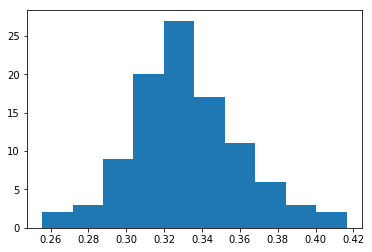

In [17]:
plt.hist(res);

In [19]:
print('P(C|A) = ',np.mean(res), 'pm', np.std(res))

P(C|A) =  0.33247324732473255 pm 0.029090528412286924
